In [24]:
import sympy as sp
from math import *
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np

In [11]:
import warnings
warnings.filterwarnings('ignore')

## Q1. Bootstrapping a CDS curve
1. Recover the hazard rate curve from the slide “Bootstrapping Default Probabilities from CDS” (slide 17) of the notes.

$$\begin{align*}
CDS Spread=(1-R)\frac{\int_0^T\lambda(\tau)e^{-\int_0^{\tau}r(u+\lambda(u)du)}d\tau}{\int_0^Te^{-\int_0^{\tau}r(u+\lambda(u)du)}d\tau}
\end{align*}$$

In [2]:
def equation1(lambda0):
    return 50 * 10**(-4) - (1 - 0.6) * lambda0
def equation2(lambda3):
    return 60 * 10**(-4) - (1 - 0.6) * (1 - exp(-3 * lambda0) + exp(-3 * lambda0) * (1 - exp(-2 * lambda3))) / ((1 - exp(-3 * lambda0)) / lambda0 + exp(-3 * lambda0) / lambda3 * (1 - exp(-2 * lambda3)))
def equation3(lambda5):
    return 100 * 10**(-4) - (1 - 0.6) * (1 - exp(-3 * lambda0) + exp(-3 * lambda0) * (1 - exp(-2 * lambda3)) + exp(-3 * lambda0 - 2 * lambda3) * (1 - exp(-5 * lambda5))) / ((1 - exp(-3 * lambda0)) / lambda0 + exp(-3 * lambda0) / lambda3 * (1 - exp(-2 * lambda3)) + exp(-3 * lambda0 - 2 * lambda3) / lambda5 * (1 - exp(-5 * lambda5)))


In [3]:
lambda0 = fsolve(equation1, [0.1])[0]

In [12]:
lambda3 = fsolve(equation2, [0.1])[0]

In [13]:
lambda5 = fsolve(equation3, [0.1])[0]

Text(0, 0.5, 'Hazard Rate')

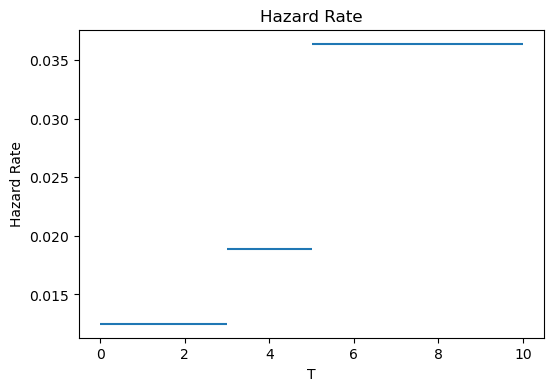

In [16]:
plt.figure(figsize = (6, 4))
plt.hlines(lambda0, 0, 3)
plt.hlines(lambda3, 3, 5)
plt.hlines(lambda5, 5, 10)
plt.title("Hazard Rate")
plt.xlabel("T")
plt.ylabel("Hazard Rate")

2. Use this hazard rate curve to price a 6-year bond on the same company which pays 2% coupon every 6 month and has face value $100.

In [28]:
# risk-free rate = 0
V_t = np.exp(np.cumsum([-lambda0 * 0.5] * 6 + [-lambda3 * 0.5] * 4 + [-lambda5 * 0.5] * 2)) # probability of surviving
2 * np.sum(V_t) + 100 * V_t[-1]

112.30931331084605

## Q2. Historical vs bond-implied hazard rates
Explain the patterns you see in the tamble on the slide “Comparing Hazard Rates” (slide 19) of the notes

**Patterns and Trends**
1. High Ratios for High Credit Ratings:
    The ratios for Aaa and Aa ratings are significantly higher than those for lower ratings, at 17.3 and 7.4 respectively. This indicates that the market-implied hazard rates for high credit ratings are much higher than historical rates. This could be because the market prices in a higher default risk for these bonds despite their low historical default rates.
2. Lower Ratios for Low Credit Ratings:
    The ratios for Ba, B, and Caa ratings are lower, at 2.2, 1.5, and 1.5 respectively. This suggests that the market-implied hazard rates for low credit ratings are closer to historical rates. This might be because the high default risk for these bonds is already well reflected in historical data, and the market prices them accordingly.
3. Larger Absolute Differences for High Credit Ratings:
    The absolute differences for Aaa, Aa, and A ratings are relatively large, at 0.561%, 0.630%, and 0.912% respectively. This means that despite the low historical default rates, the market significantly overestimates the default risk for these ratings.
4. Largest Absolute Difference for Caa Rating:
    The Caa rating has the largest absolute difference of 6.379%. This indicates that the market perceives a much higher default risk for the lowest-rated bonds compared to historical data, reflecting a heightened sensitivity and caution towards extremely high-risk bonds.

**Explanation of Reasons**
1. Market Risk Premium:
    The market generally demands higher yields for higher-risk bonds (lower credit ratings), reflected in higher implied hazard rates.
2. Asymmetry in Credit Ratings:
    For high credit ratings, due to infrequent default events, the market might overestimate default risk to avoid underestimating the risk.
3. Differences in Time Span and Data Sources:
    Moody’s data spans a longer period (1970-2013), while Merrill Lynch’s data spans a shorter period (1996-2007). Differences in economic conditions and market environments across these periods could lead to variations in estimated hazard rates.


## Q3. Optional: Dynamic credit model
Consider 8 categories: AAA, AA, A BBB, BB, B, CCC and default. We are interested in constructing a stochastic dynamic model of rating and default in continuous time. For this we will use the information in slide “Rating Transitions” (slide 7) of the notes.
1. Let us call P (t) the 8 × 8 matrix of transition probability after time t. This means that Pij (t) is the probability of being in category j at date t if the firm is in category i at date 0.
* (a) What is P (0)?
* (b) What is P (1)?

2. Just like we defined the hazard rate has the instantaneous probability of default, we can consider instantaneous transition probability λij such that λij dt is the probability of going from rating i to rating j during an interval dt if i ̸ = j. When i = j, we define λii as the opposite of the intensity of leaving state i: λii = − Pj̸ =i λij . We can put all these in a matrix Λ. Express Λ as a function of P and its first derivative.

3. Assuming that Λ is constant over time, derive an expression relating P (1) and Λ.

4. Compute Λ for the values of slide “Rating Transitions” (slide 7) of the notes.

5. Use this matrix Λ to compute the probabilities of default at horizon 1, 2, 3, 4, 5, 7, and 10 years given each initial rating.

6. Compare your results to the slide “Historical Default Probabilities” (slide 6) of the notes. What can explain the similarities and differences?

7. Use this model to price a 6-year bond on a BBB company which pays 3% coupon every 6 month and has face value $100. Assume that the risk-free interest rate is 0% and recovery is 60%

8. Compute the 3, 5, and 10-year CDS spreads for the same company.